In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
data = pd.read_csv('final_data.csv').drop(columns=["Unnamed: 0"], axis=1)
data['label'] = (data['close'] > data['close'].shift(1)) * 1
data

,date,open_x,high_x,low_x,close_x,volume_x,market cap_x,open_y,high_y,low_y,...,roc,rsi,r_50,hl_pct_change_5,cmf,T3,low_5,safe_dump_50,wprice,label
0,2015-11-15,0.8912,0.9215,0.8750,0.9064,4.118480e+05,6.774580e+07,1.0,1.0,1.0000,...,-14.500494,47.986181,-66.665400,0.146445,0.017273,333.471361,301.00,True,300.654281,0
1,2015-11-16,0.9062,0.9447,0.8920,0.9290,6.209450e+05,6.945801e+07,1.0,1.0,1.0000,...,-14.419892,50.903300,-62.643962,0.101225,0.026485,328.956688,301.00,True,300.969886,1
2,2015-11-17,0.9249,1.0300,0.9058,1.0100,1.145440e+06,7.539216e+07,1.0,1.0,1.0000,...,-10.252564,52.090292,-61.733477,0.079171,0.012844,327.028262,313.36,True,301.404360,1
3,2015-11-18,0.9932,1.0100,0.9405,0.9933,6.811040e+05,7.432077e+07,1.0,1.0,1.0000,...,-12.010204,51.934510,-61.925829,0.071067,0.004090,326.917383,315.90,True,301.763673,0
4,2015-11-19,0.9887,1.0100,0.9375,0.9555,4.435280e+05,7.151734e+07,1.0,1.0,1.0000,...,-3.167864,49.256687,-65.172732,0.071067,-0.035436,326.828088,315.90,True,302.068671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2023-01-14,1451.4300,1563.7400,1450.9900,1550.7100,1.544463e+10,1.897660e+11,1.0,1.0,1.0000,...,24.586470,89.342983,-1.968685,0.227941,0.468759,18756.423324,17093.99,True,26923.873779,1
2618,2023-01-15,1550.7300,1556.9500,1520.8900,1552.4800,6.774614e+09,1.899829e+11,1.0,1.0,1.0000,...,23.176244,87.398282,-3.870844,0.215547,0.447934,19468.171193,17162.99,True,26921.508307,0
2619,2023-01-16,1552.5200,1594.0400,1529.5700,1576.8300,8.454485e+09,1.929632e+11,1.0,1.0,1.0000,...,24.857152,88.232537,-3.603991,0.187032,0.487565,20124.296268,17337.99,True,26918.364532,1
2620,2023-01-17,1577.1100,1594.0000,1553.3400,1567.8500,7.599463e+09,1.918634e+11,1.0,1.0,1.0000,...,23.815731,88.056261,-5.229787,0.143203,0.490496,20658.050508,17995.20,True,26915.489781,0


In [ ]:
data[['close', 'label']]

,close,label
0,320.17,0
1,330.75,1
2,335.09,1
3,334.59,0
4,326.15,0
...,...,...
2617,20976.30,1
2618,20880.80,0
2619,21169.63,1
2620,21161.52,0


# Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

y = data.pop('label')
X = data

scale = StandardScaler()
x = scale.fit_transform(X.iloc[:, 1:])
x = pd.DataFrame(x , columns=X.columns[1:])

# Random Forest

Elapsed time to compute the importances: 0.009 seconds


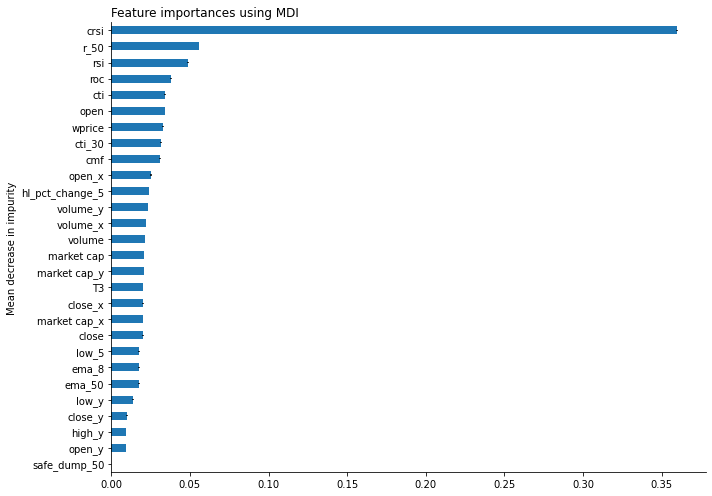

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feature_names = x.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(x, y)

import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
forest_importances.sort_values().plot.barh(yerr=std, ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Feature importances using MDI", loc='left')
ax.set_ylabel("Mean decrease in impurity")
# plt.xticks(rotation = 45)
fig.tight_layout()



In [ ]:
rforest_features = forest_importances[forest_importances > 0.025].index.to_list()

In [ ]:
rforest_features

['open_x',
 'open',
 'cti',
 'cti_30',
 'crsi',
 'roc',
 'rsi',
 'r_50',
 'cmf',
 'wprice']

# Patterns

### 1: btc price trend

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X.iloc[: , 1:])
scaled_x = pd.DataFrame(scaled_x , columns=X.columns[1:])

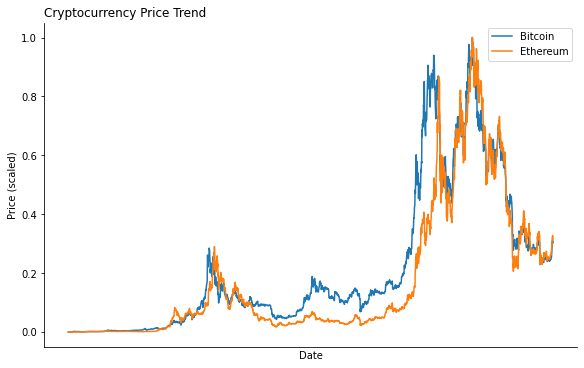

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
ax.plot(X.date , scaled_x.close, label='Bitcoin')
ax.plot(X.date , scaled_x.close_x, label='Ethereum')

# Major ticks every half year, minor ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_ylabel(r'Price (scaled)')
ax.set_xlabel('Date')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

ax.set_title('Cryptocurrency Price Trend',loc= 'left')#, fontsize='medium')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()


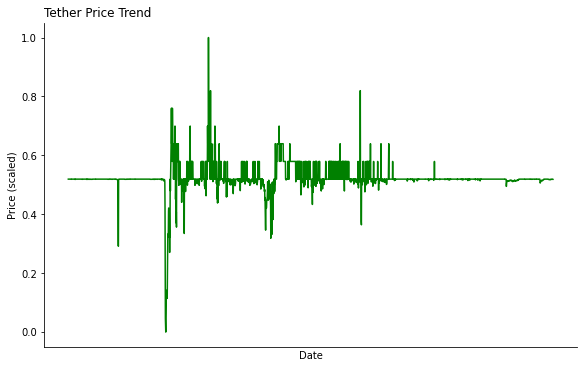

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
plt.plot(X.date, scaled_x.close_y , color= 'g')

# Major ticks every half year, minor ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_ylabel(r'Price (scaled)')
ax.set_xlabel('Date')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Tether Price Trend',loc= 'left')#, fontsize='medium')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()


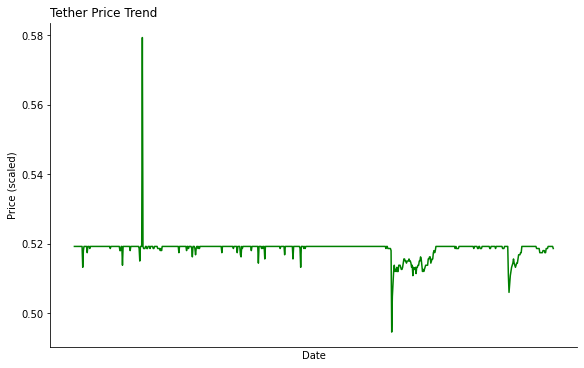

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
plt.plot(X[X['date'] > '2021'].date, scaled_x[X['date'] > '2021'].close_y , color= 'g')

# Major ticks every half year, minor ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_ylabel(r'Price (scaled)')
ax.set_xlabel('Date')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Tether Price Trend',loc= 'left')#, fontsize='medium')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

### 2: candle stick

In [ ]:
X.date = pd.to_datetime(X.date)


In [ ]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open": "first",
        "high": "max",
        "low": "min",
        "close": "last",
        'volume': 'sum'
    })

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open'],
                high=df_n['high'],
                low=df_n['low'],
                close=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Price Monthly Candlestick',    xaxis_title="Date", yaxis_title="Price")
fig.show()

In [ ]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open_x": "first",
        "high_x": "max",
        "low_x": "min",
        "close_x": "last",
        'volume_x': 'sum'
    })

fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open_x'],
                high=df_n['high_x'],
                low=df_n['low_x'],
                close=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='Etherium Price Monthly Candlestick',    xaxis_title="Date", yaxis_title="Price")
fig.show()

In [ ]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open_y": "first",
        "high_y": "max",
        "low_y": "min",
        "close_y": "last",
        'volume_y': 'sum'
    })

fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open_y'],
                high=df_n['high_y'],
                low=df_n['low_y'],
                close=df_n['close_y'])])

fig.update_layout(plot_bgcolor="white", title_text='Tether Price Monthly Candlestick',    xaxis_title="Date", yaxis_title="Price")
fig.show()

### pattern 3:

In [ ]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2022-12-18 to 2023-01-18',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

<ipython-input-18-17d1e1bb965c>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
l_period = len(df_n)
pattern = df_n['close'].values

In [ ]:
def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

In [ ]:
def similarity_fun(metric, pattern2):
    l = range(len(pattern2) - l_period)
    minimum = 9999
    start = -1
    end = -1
    for i in l:
        d = metric(pattern, pattern2[i: i+l_period])
        if d < minimum:
            minimum = d
            start = i
            end = i+l_period
    return minimum, start, end

In [ ]:
df_n = x
df_n['date'] = X.date
df_2 = df_n[df_n['date'] < '2022-12-18'].reset_index().drop(['index'], axis=1)
pattern2 = df_2['close'].values
minimum, start, end = similarity_fun(calc_mape, pattern2)

print(f"max similarity of {df_2['date'].iat[start]} -- {df_2['date'].iat[end]}: {minimum}")

max similarity of 2022-11-12 00:00:00 -- 2022-12-14 00:00:00: 0.22884904135021078


In [ ]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2022-12-18 to 2023-01-18',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-11-12'][df_n['date'] <= '2022-12-14'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2022-11-12 to 2022-12-14',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

<ipython-input-23-a3dd565a1825>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-23-a3dd565a1825>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df_n = x
df_n['date'] = X.date
pattern2 = df_n['close_x'].values
minimum, start, end = similarity_fun(calc_mape, pattern2)

print(f"max similarity of {df_n['date'].iat[start]} -- {df_n['date'].iat[end]}: {minimum}")

max similarity of 2018-02-01 00:00:00 -- 2018-03-05 00:00:00: 0.8150529809342746


In [ ]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2022-12-18 to 2023-01-18',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2018-02-01'][df_n['date'] <= '2018-03-05'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='Etherium Daily scaled close price from 2018-02-01 to 2018-03-05',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

<ipython-input-25-13ce7c83654b>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-25-13ce7c83654b>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
def similarity_fun(metric, pattern2):
    l = range(len(pattern2) - l_period)
    maximum = -2
    start = -1
    end = -1
    for i in l:
        d = metric(pattern, pattern2[i: i+l_period])
        if d > maximum:
            maximum = d
            start = i
            end = i+l_period
    return maximum, start, end

def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)

    numerator = np.sum(a_diff * p_diff)

    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

In [ ]:
df_n = x
df_n['date'] = X.date
df_2 = df_n[df_n['date'] < '2022-12-18'].reset_index().drop(['index'], axis=1)
pattern2 = df_2['close'].values
maximum, start, end = similarity_fun(calc_correlation, pattern2)

print(f"max similarity of {df_2['date'].iat[start]} -- {df_2['date'].iat[end]}: {maximum}")

max similarity of 2020-07-02 00:00:00 -- 2020-08-03 00:00:00: 0.9760954125842528


In [ ]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2022-12-18 to 2023-01-18',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2020-07-02'][df_n['date'] <= '2020-08-03'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2020-07-02 to 2020-08-03',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

<ipython-input-28-931a6e46221d>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-28-931a6e46221d>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df_n = x
df_n['date'] = X.date
pattern2 = df_n['close_x'].values
maximum, start, end = similarity_fun(calc_correlation, pattern2)

print(f"max similarity of {df_n['date'].iat[start]} -- {df_n['date'].iat[end]}: {maximum}")

max similarity of 2020-12-10 00:00:00 -- 2021-01-11 00:00:00: 0.973527337713697


In [ ]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='Bitcoin Daily scaled close price from 2022-12-18 to 2023-01-18',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2020-12-10'][df_n['date'] <= '2021-01-11'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='Etherium Daily scaled close price from 2020-12-10 to 2021-01-11',   xaxis_title="Date", yaxis_title="Price (scaled)")
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 0.9)#, row = 1, col = 1, mirror = True)
fig.show()

<ipython-input-30-d95ac3bcf022>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-30-d95ac3bcf022>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Feature Selection

In [ ]:
if 'date' in x.columns:
  x.drop(columns=['date'], axis=1, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)
to_drop


['high_x',
 'low_x',
 'close_x',
 'market cap_x',
 'high',
 'low',
 'close',
 'market cap',
 'ema_8',
 'T3',
 'low_5']

In [ ]:
x.drop(['high_x' , 'low_x' , 'high' , 'low'], axis=1, inplace=True)

In [ ]:
x.dtypes

open_x             float64
close_x            float64
volume_x           float64
market cap_x       float64
open_y             float64
high_y             float64
low_y              float64
close_y            float64
volume_y           float64
market cap_y       float64
open               float64
close              float64
volume             float64
market cap         float64
ema_8              float64
ema_50             float64
cti                float64
cti_30             float64
crsi               float64
roc                float64
rsi                float64
r_50               float64
hl_pct_change_5    float64
cmf                float64
T3                 float64
low_5              float64
safe_dump_50       float64
wprice             float64
dtype: object

In [ ]:
train_ratio = 0.9
l = int(train_ratio * len(x))
x_train = x.iloc[:l]
y_train = y.iloc[:l]
x_test = x.iloc[l:]
y_test = y.iloc[l:]

In [ ]:
accuracies = {}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def TNR(cmp):
  FP = cmp.sum(axis=0) - np.diag(cmp)
  FN = cmp.sum(axis=1) - np.diag(cmp)
  TP = np.diag(cmp)
  TN = cmp.sum() - (FP + FN + TP)
  return (TN/(TN+FP))[1]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_train.value_counts()

1    1288
0    1071
Name: label, dtype: int64

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16       139
           1       0.49      1.00      0.66       124

    accuracy                           0.52       263
   macro avg       0.75      0.54      0.41       263
weighted avg       0.76      0.52      0.40       263



true negative rate: 0.08633093525179857
f0.5 score: 0.5496453900709221


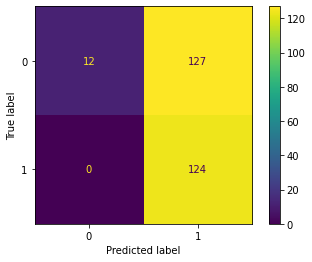

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['l_reg'] = accuracy_score(y_test, y_pred)

# SVM

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='sigmoid', probability=True) 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='sigmoid', probability=True)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

true negative rate: 0.7913669064748201
f0.5 score: 0.7565789473684211


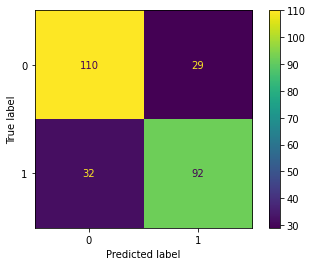

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       139
           1       0.76      0.74      0.75       124

    accuracy                           0.77       263
   macro avg       0.77      0.77      0.77       263
weighted avg       0.77      0.77      0.77       263



In [ ]:
accuracies['svm'] = accuracy_score(y_test, y_pred)

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       139
           1       0.85      0.90      0.87       124

    accuracy                           0.88       263
   macro avg       0.88      0.88      0.88       263
weighted avg       0.88      0.88      0.88       263



true negative rate: 0.8633093525179856
f0.5 score: 0.8618012422360248


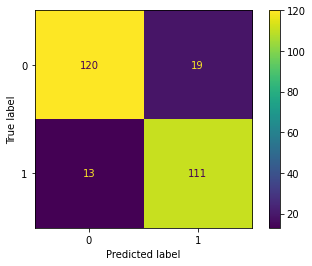

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['decision_tree'] = accuracy_score(y_test, y_pred)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
y_pred = nbrs.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       139
           1       0.68      0.73      0.70       124

    accuracy                           0.71       263
   macro avg       0.71      0.71      0.71       263
weighted avg       0.71      0.71      0.71       263



true negative rate: 0.6906474820143885
f0.5 score: 0.6859756097560975


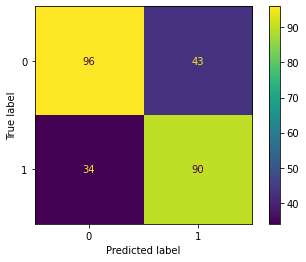

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['knn'] = accuracy_score(y_test, y_pred)

# Transformer

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#set labels for training data to categorical
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(y_train, 2)

In [ ]:
x_train.shape

(2359, 28)

In [ ]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
train_X.shape

(2359, 28, 1)

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


In [ ]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.2,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/10),
    metrics=["categorical_accuracy"],
)

history = model.fit(
    train_X,
    train_y,
    epochs=15,
    batch_size=32,
)

Epoch 1/15
74/74 [==============================] - 8s 24ms/step - loss: 0.6118 - categorical_accuracy: 0.6660
Epoch 2/15
74/74 [==============================] - 2s 23ms/step - loss: 0.4945 - categorical_accuracy: 0.7698
Epoch 3/15
74/74 [==============================] - 2s 23ms/step - loss: 0.4324 - categorical_accuracy: 0.8139
Epoch 4/15
74/74 [==============================] - 2s 24ms/step - loss: 0.3914 - categorical_accuracy: 0.8364
Epoch 5/15
74/74 [==============================] - 2s 24ms/step - loss: 0.3675 - categorical_accuracy: 0.8453
Epoch 6/15
74/74 [==============================] - 2s 23ms/step - loss: 0.3398 - categorical_accuracy: 0.8571
Epoch 7/15
74/74 [==============================] - 2s 23ms/step - loss: 0.3230 - categorical_accuracy: 0.8622
Epoch 8/15
74/74 [==============================] - 2s 23ms/step - loss: 0.3074 - categorical_accuracy: 0.8745
Epoch 9/15
74/74 [==============================] - 2s 26ms/step - loss: 0.2947 - categorical_accuracy: 0.8783
E

In [ ]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))

9/9 [==============================] - 1s 6ms/step


In [ ]:
y_pred = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0,))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51       139
           1       0.57      1.00      0.73       124

    accuracy                           0.65       263
   macro avg       0.79      0.67      0.62       263
weighted avg       0.80      0.65      0.61       263



true negative rate: 0.3381294964028777
f0.5 score: 0.6275303643724696


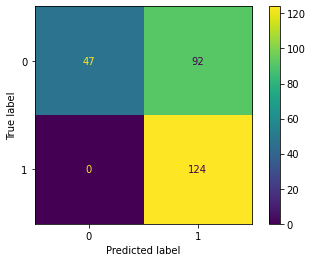

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['transformer'] = accuracy_score(y_test, y_pred)

# BiLSTM

In [ ]:
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 64
activ_func = "linear"

model.add(Bidirectional(LSTM(neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func)))
model.add(Dropout(dropout))

model.add(Bidirectional(LSTM(neurons, return_sequences=False, activation=activ_func)))
model.add(Dropout(dropout))

model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
37/37 [==============================] - 11s 203ms/step - loss: 0.6712 - accuracy: 0.5774
Epoch 2/20
37/37 [==============================] - 7s 199ms/step - loss: 0.6582 - accuracy: 0.6019
Epoch 3/20
37/37 [==============================] - 7s 201ms/step - loss: 0.6546 - accuracy: 0.6147
Epoch 4/20
37/37 [==============================] - 9s 232ms/step - loss: 0.6512 - accuracy: 0.5998
Epoch 5/20
37/37 [==============================] - 7s 195ms/step - loss: 0.6480 - accuracy: 0.6147
Epoch 6/20
37/37 [==============================] - 7s 201ms/step - loss: 0.6492 - accuracy: 0.6062
Epoch 7/20
37/37 [==============================] - 7s 197ms/step - loss: 0.6470 - accuracy: 0.6159
Epoch 8/20
37/37 [==============================] - 8s 207ms/step - loss: 0.6533 - accuracy: 0.6138
Epoch 9/20
37/37 [==============================] - 8s 208ms/step - loss: 0.6481 - accuracy: 0.6164
Epoch 10/20
37/37 [==============================] - 8s 212ms/step - loss: 0.6533 - accuracy: 0.606

In [ ]:
y_pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 1s 15ms/step


In [ ]:
print(classification_report(y_test, y_pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       139
           1       0.61      0.41      0.49       124

    accuracy                           0.60       263
   macro avg       0.60      0.59      0.58       263
weighted avg       0.60      0.60      0.59       263



true negative rate: 0.7697841726618705
f0.5 score: 0.5592105263157895


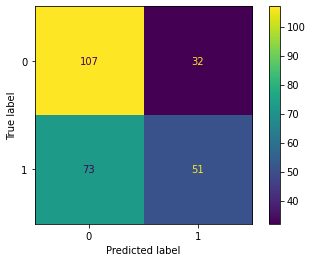

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['bilstm'] = accuracy_score(y_test, y_pred)

# CNN

In [ ]:
from keras.layers import Convolution1D, Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
neurons = 64
epochs = 50
dropout = 0.2
batch_size = 32
activ_func = "ReLU"

model.add(Conv1D(neurons, kernel_size=2, padding='same', input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

#flatten and add a dense layer and to output the prediction
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/50
74/74 [==============================] - 1s 5ms/step - loss: 0.6847 - accuracy: 0.5613
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.5286
Epoch 3/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.6130
Epoch 4/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6308
Epoch 5/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6664
Epoch 6/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5907 - accuracy: 0.7024
Epoch 7/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5725 - accuracy: 0.7189
Epoch 8/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7401
Epoch 9/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5394 - accuracy: 0.7418
Epoch 10/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5200 - accuracy: 0.7452
Epoch 11/50
74/74 [

In [ ]:
y_pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       139
           1       0.85      0.99      0.92       124

    accuracy                           0.92       263
   macro avg       0.92      0.92      0.92       263
weighted avg       0.93      0.92      0.92       263



true negative rate: 0.8489208633093526
f0.5 score: 0.8785714285714284


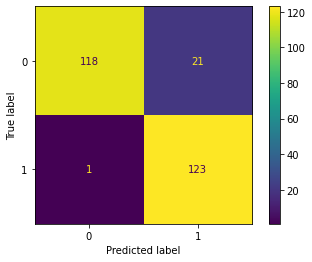

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['cnn'] = accuracy_score(y_test, y_pred)

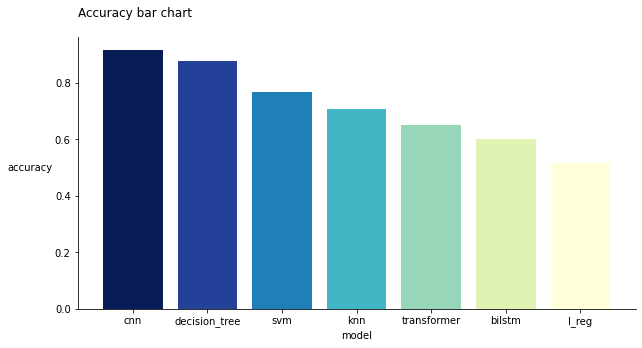

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
accuracies_sorted = dict(sorted(accuracies.items(), key=lambda x:x[1], reverse=True))
cmap_mpl = plt.get_cmap("YlGnBu")
cmap_mpl = cmap_mpl.reversed()
k = np.linspace(0, 1, num=7)
ax.bar(accuracies_sorted.keys(), accuracies_sorted.values(),color=cmap_mpl(k))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('accuracy', rotation=0, labelpad=25)
plt.xlabel('model')
plt.title('Accuracy bar chart', loc='left', pad=20);
plt.show()

# part 2

In [ ]:
x_ = x[rforest_features]
train_ratio = 0.9
l = int(train_ratio * len(x_))
x_train = x_.iloc[:l]
y_train = y.iloc[:l]
x_test = x_.iloc[l:]
y_test = y.iloc[l:]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15       139
           1       0.49      1.00      0.66       124

    accuracy                           0.51       263
   macro avg       0.75      0.54      0.40       263
weighted avg       0.76      0.51      0.39       263



true negative rate: 0.07913669064748201
f0.5 score: 0.547703180212014


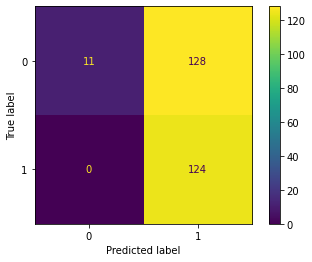

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['l_reg'] = accuracy_score(y_test, y_pred)

# SVM

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='sigmoid') 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='sigmoid')

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       139
           1       0.69      0.71      0.70       124

    accuracy                           0.71       263
   macro avg       0.71      0.71      0.71       263
weighted avg       0.72      0.71      0.71       263



true negative rate: 0.7194244604316546
f0.5 score: 0.6962025316455696


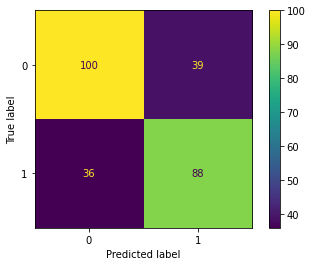

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['svm'] = accuracy_score(y_test, y_pred)

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       139
           1       0.85      0.94      0.90       124

    accuracy                           0.90       263
   macro avg       0.90      0.90      0.90       263
weighted avg       0.90      0.90      0.90       263



true negative rate: 0.8561151079136691
f0.5 score: 0.8705357142857143


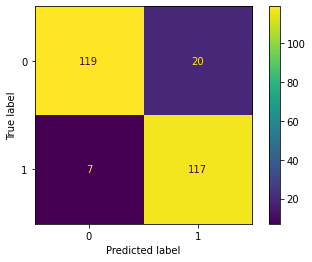

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['decision_tree'] = accuracy_score(y_test, y_pred)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=6).fit(x_train,y_train)
y_pred = nbrs.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       139
           1       0.74      0.94      0.83       124

    accuracy                           0.82       263
   macro avg       0.84      0.82      0.82       263
weighted avg       0.84      0.82      0.82       263



true negative rate: 0.7050359712230215
f0.5 score: 0.7738095238095237


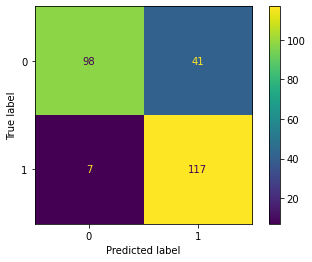

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['knn'] = accuracy_score(y_test, y_pred)

# Transformer

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#set labels for training data to categorical
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(y_train, 2)

In [ ]:
x_train.shape

(2359, 10)

In [ ]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
train_X.shape

(2359, 10, 1)

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


In [ ]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.2,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/10),
    metrics=["categorical_accuracy"],
)

history = model.fit(
    train_X,
    train_y,
    epochs=15,
    batch_size=32,
)

Epoch 1/15
74/74 [==============================] - 8s 23ms/step - loss: 0.6348 - categorical_accuracy: 0.6503
Epoch 2/15
74/74 [==============================] - 2s 23ms/step - loss: 0.5229 - categorical_accuracy: 0.7609
Epoch 3/15
74/74 [==============================] - 2s 23ms/step - loss: 0.4731 - categorical_accuracy: 0.7936
Epoch 4/15
74/74 [==============================] - 2s 22ms/step - loss: 0.4403 - categorical_accuracy: 0.8097
Epoch 5/15
74/74 [==============================] - 2s 22ms/step - loss: 0.4140 - categorical_accuracy: 0.8249
Epoch 6/15
74/74 [==============================] - 2s 22ms/step - loss: 0.3935 - categorical_accuracy: 0.8355
Epoch 7/15
74/74 [==============================] - 2s 22ms/step - loss: 0.3725 - categorical_accuracy: 0.8419
Epoch 8/15
74/74 [==============================] - 2s 22ms/step - loss: 0.3559 - categorical_accuracy: 0.8482
Epoch 9/15
74/74 [==============================] - 2s 23ms/step - loss: 0.3450 - categorical_accuracy: 0.8546
E

In [ ]:
y_pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))

9/9 [==============================] - 1s 8ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0,))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43       139
           1       0.55      1.00      0.71       124

    accuracy                           0.62       263
   macro avg       0.78      0.64      0.57       263
weighted avg       0.79      0.62      0.56       263



true negative rate: 0.2733812949640288
f0.5 score: 0.60546875


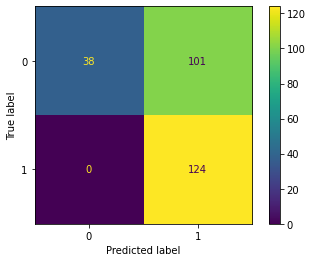

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['transformer'] = accuracy_score(y_test, y_pred)

# BiLSTM

In [ ]:
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 64
activ_func = "linear"

model.add(Bidirectional(LSTM(neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func)))
model.add(Dropout(dropout))

model.add(Bidirectional(LSTM(neurons, return_sequences=False, activation=activ_func)))
model.add(Dropout(dropout))

model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
37/37 [==============================] - 7s 79ms/step - loss: 0.6594 - accuracy: 0.6024
Epoch 2/20
37/37 [==============================] - 3s 78ms/step - loss: 0.6469 - accuracy: 0.6172
Epoch 3/20
37/37 [==============================] - 3s 79ms/step - loss: 0.6440 - accuracy: 0.6134
Epoch 4/20
37/37 [==============================] - 3s 76ms/step - loss: 0.6442 - accuracy: 0.6176
Epoch 5/20
37/37 [==============================] - 3s 79ms/step - loss: 0.6433 - accuracy: 0.6193
Epoch 6/20
37/37 [==============================] - 3s 79ms/step - loss: 0.6429 - accuracy: 0.6202
Epoch 7/20
37/37 [==============================] - 3s 75ms/step - loss: 0.6416 - accuracy: 0.6244
Epoch 8/20
37/37 [==============================] - 3s 78ms/step - loss: 0.6410 - accuracy: 0.6236
Epoch 9/20
37/37 [==============================] - 3s 76ms/step - loss: 0.6383 - accuracy: 0.6287
Epoch 10/20
37/37 [==============================] - 3s 81ms/step - loss: 0.6362 - accuracy: 0.6312
Epoch 11/

In [ ]:
y_pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 1s 8ms/step


In [ ]:
print(classification_report(y_test, y_pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       139
           1       0.72      0.79      0.75       124

    accuracy                           0.75       263
   macro avg       0.75      0.75      0.75       263
weighted avg       0.76      0.75      0.75       263



true negative rate: 0.7194244604316546
f0.5 score: 0.7291666666666667


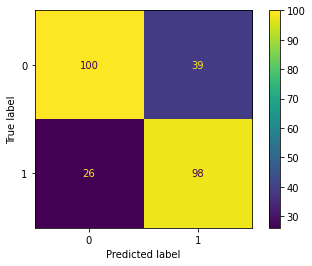

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['bilstm'] = accuracy_score(y_test, y_pred)

# CNN

In [ ]:
from keras.layers import Convolution1D, Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
neurons = 64
epochs = 50
dropout = 0.2
batch_size = 32
activ_func = "ReLU"

model.add(Conv1D(neurons, kernel_size=2, padding='same', input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

#flatten and add a dense layer and to output the prediction
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/50
74/74 [==============================] - 1s 7ms/step - loss: 0.6696 - accuracy: 0.5668
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6138
Epoch 3/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.6325
Epoch 4/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.6804
Epoch 5/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5955 - accuracy: 0.6939
Epoch 6/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5965 - accuracy: 0.6910
Epoch 7/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5754 - accuracy: 0.6990
Epoch 8/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7062
Epoch 9/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.7096
Epoch 10/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.7185
Epoch 11/50
74/74 [

In [ ]:
y_pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 0s 8ms/step


In [ ]:
print(classification_report(y_test, y_pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       139
           1       0.89      0.96      0.92       124

    accuracy                           0.92       263
   macro avg       0.92      0.93      0.92       263
weighted avg       0.93      0.92      0.92       263



true negative rate: 0.8920863309352518
f0.5 score: 0.9015151515151515


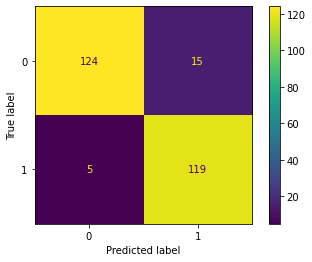

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
accuracies['cnn'] = accuracy_score(y_test, y_pred)

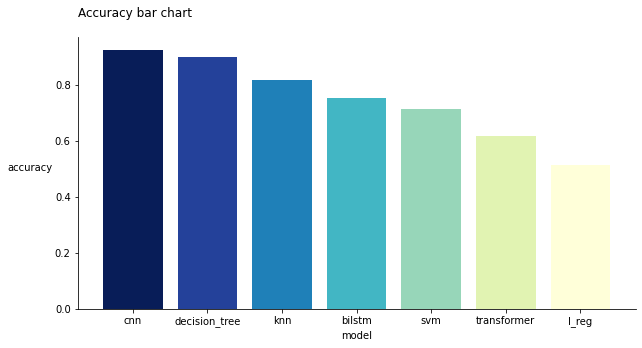

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
accuracies_sorted = dict(sorted(accuracies.items(), key=lambda x:x[1], reverse=True))
cmap_mpl = plt.get_cmap("YlGnBu")
cmap_mpl = cmap_mpl.reversed()
k = np.linspace(0, 1, num=7)
ax.bar(accuracies_sorted.keys(), accuracies_sorted.values(),color=cmap_mpl(k))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('accuracy', rotation=0, labelpad=25)
plt.xlabel('model')
plt.title('Accuracy bar chart', loc='left', pad=20);
plt.show()

# Part 3

## Ensemble

In [ ]:
#x has 28 features
train_ratio = 0.9
l = int(train_ratio * len(x))
x_train = x.iloc[:l]
y_train = y.iloc[:l]
x_test = x.iloc[l:]
y_test = y.iloc[l:]

In [ ]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#set labels for training data to categorical
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(y_train, 2)

## SVM

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='sigmoid', probability=True) 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='sigmoid', probability=True)

In [ ]:
y_pred = clf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       139
           1       0.76      0.74      0.75       124

    accuracy                           0.77       263
   macro avg       0.77      0.77      0.77       263
weighted avg       0.77      0.77      0.77       263



In [ ]:
import pickle
with open('model_1.pickle', 'wb') as handle:
    pickle.dump(clf, handle)

In [ ]:
target_names = ['0', '1']

In [ ]:
#x_s has 9 or 10 features
x_s = x[rforest_features]
train_ratio = 0.9
l = int(train_ratio * len(x_s))
x_train = x_s.iloc[:l]
y_train = y.iloc[:l]
x_test = x_s.iloc[l:]
y_test = y.iloc[l:]

In [ ]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_train.shape[1], 1))

In [ ]:
#set labels for training data to categorical
train_y = to_categorical(y_train, 2)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=6).fit(x_train,y_train)
y_pred = nbrs.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       139
           1       0.74      0.94      0.83       124

    accuracy                           0.82       263
   macro avg       0.84      0.82      0.82       263
weighted avg       0.84      0.82      0.82       263



In [ ]:
import pickle
with open('model_2.pickle', 'wb') as handle:
    pickle.dump(nbrs, handle)

## CNN

In [ ]:
model = Sequential()
neurons = 64
epochs = 50
dropout = 0.2
batch_size = 32
activ_func = "ReLU"

model.add(Conv1D(neurons, kernel_size=2, padding='same', input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

#flatten and add a dense layer and to output the prediction
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/50
74/74 [==============================] - 1s 5ms/step - loss: 0.6737 - accuracy: 0.5735
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.5990
Epoch 3/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6437 - accuracy: 0.6456
Epoch 4/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6588
Epoch 5/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6190 - accuracy: 0.6528
Epoch 6/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5973 - accuracy: 0.6956
Epoch 7/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.6914
Epoch 8/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.7020
Epoch 9/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.7173
Epoch 10/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5578 - accuracy: 0.7211
Epoch 11/50
74/74 [

In [ ]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

9/9 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       139
           1       0.90      0.97      0.93       124

    accuracy                           0.94       263
   macro avg       0.94      0.94      0.94       263
weighted avg       0.94      0.94      0.94       263



In [ ]:
model.save('model_3')

## BiLSTM

In [ ]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 64
activ_func = "linear"

model.add(Bidirectional(LSTM(neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func)))
model.add(Dropout(dropout))

model.add(Bidirectional(LSTM(neurons, return_sequences=False, activation=activ_func)))
model.add(Dropout(dropout))

model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
37/37 [==============================] - 12s 174ms/step - loss: 0.6584 - accuracy: 0.6062
Epoch 2/20
37/37 [==============================] - 8s 210ms/step - loss: 0.6476 - accuracy: 0.6168
Epoch 3/20
37/37 [==============================] - 6s 175ms/step - loss: 0.6448 - accuracy: 0.6159
Epoch 4/20
37/37 [==============================] - 7s 184ms/step - loss: 0.6435 - accuracy: 0.6193
Epoch 5/20
37/37 [==============================] - 6s 169ms/step - loss: 0.6428 - accuracy: 0.6181
Epoch 6/20
37/37 [==============================] - 4s 103ms/step - loss: 0.6407 - accuracy: 0.6210
Epoch 7/20
37/37 [==============================] - 3s 78ms/step - loss: 0.6409 - accuracy: 0.6206
Epoch 8/20
37/37 [==============================] - 3s 77ms/step - loss: 0.6402 - accuracy: 0.6278
Epoch 9/20
37/37 [==============================] - 4s 115ms/step - loss: 0.6382 - accuracy: 0.6320
Epoch 10/20
37/37 [==============================] - 3s 81ms/step - loss: 0.6360 - accuracy: 0.6414
E

In [ ]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

9/9 [==============================] - 1s 7ms/step


In [ ]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       139
           1       0.74      0.84      0.78       124

    accuracy                           0.78       263
   macro avg       0.79      0.79      0.78       263
weighted avg       0.79      0.78      0.78       263



In [ ]:
model.save('model_4')

* start ensembling

In [ ]:
from keras.models import load_model

In [ ]:
with open('model_1.pickle', 'rb') as handle:
    model_1 = pickle.load(handle)
with open('model_2.pickle', 'rb') as handle:
    model_2 = pickle.load(handle)
model_3 = load_model('model_3')
model_4 = load_model('model_4')

In [ ]:
#x has 28 features
train_ratio = 0.9
l = int(train_ratio * len(x))
x_test = x.iloc[l:]
y_test = y.iloc[l:]
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
pred_1 = model_1.predict(x_test)

In [ ]:
#x_s has 9 or 10 features
x_s = x[rforest_features]
train_ratio = 0.9
l = int(train_ratio * len(x))
x_test = x_s.iloc[l:]
y_test = y.iloc[l:]
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
pred_2 = model_2.predict(x_test)

In [ ]:
pred_3 = model_3.predict(test_X)
pred_3 = np.argmax(pred_3, axis=1)

9/9 [==============================] - 0s 3ms/step


In [ ]:
pred_4 = model_4.predict(test_X)
pred_4 = np.argmax(pred_4, axis=1)

9/9 [==============================] - 0s 9ms/step


In [ ]:
pred_final = []
for i in range(len(pred_1)):
    count = 0
    count += pred_1[i]
    count += pred_2[i]
    count += pred_3[i]
    count += pred_4[i]
    pred_final.append(1 if count > 2 else 0)

In [ ]:
print(classification_report(y_test, pred_final, zero_division=0,))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       139
           1       0.90      0.91      0.91       124

    accuracy                           0.91       263
   macro avg       0.91      0.91      0.91       263
weighted avg       0.91      0.91      0.91       263



true negative rate: 0.9136690647482014
f0.5 score: 0.905448717948718


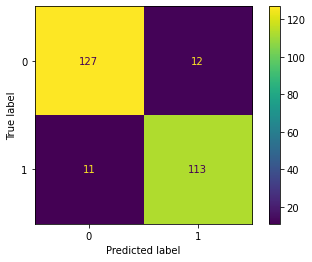

In [ ]:
cm = confusion_matrix(y_test, pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print('true negative rate:', TNR(cm))
print('f0.5 score:', fbeta_score(y_test, pred_final, average='binary', beta=0.5))